## **Histogram-Based Outlier Score (HBOS)**

HBOS is a swift and intuitive unsupervised anomaly detection algorithm, primarily crafted for high-dimensional datasets. Imagine it as having a heart-to-heart chat with your data using quaint little bars.

### **🎨 How Does HBOS Sketch Your Data's Story?**

1. **Univariate Histograms**: 
    * For each feature in your dataset, HBOS crafts a univariate histogram.
    * These histograms are akin to capturing snapshots, each telling where most of the data feels most at home.

2. **The Art of Outlier Scoring**:
    * For each quaint data point, and each feature, pinpoint which bin our data point cozies up in.
    * The height of this bin, or the count of data points in it, whispers how common or rare this value is. A bustling bin? It's a regular party spot for your data. A sparse bin? Seems like a more secluded, outlier-esque corner.
    * Etch the score as \( \log(1/\text{frequency}) \). The more elusive the data point's value (for that feature), the closer this score snuggles to zero.

3. **The Grand Summation**:
    * Sum up the outlier scores from each feature to unveil a final score for our data point.
    * A score deeply dipped in negatives? Ah, our data point is in familiar territory. A score nudging zero? That's a beacon of a potential outlier!

### **🧐 The Charm of HBOS**

* **Swift as the Wind**: Its speed is remarkable, especially when pitted against more cumbersome multivariate contenders.
* **Simplicity at Heart**: HBOS is devoid of convoluted computations. It’s more of a breezy chat with your data rather than a prolonged tête-à-tête.
* **Crystal Clear**: Its methodology is lucid and transparent. No murky mysteries here!

### **🚀 When Should You Use HBOS?**

HBOS shines with high-dimensional data, where traditionalists like clustering or nearest-neighbors would dawdle. But bear in mind, HBOS is a solo dancer; it treats each feature in isolation. So, if your data thrives on inter-feature camaraderie, perhaps another partner would be more fitting.

---



### Using PyOD libraries

In [31]:
import numpy as np
import pandas as pd
from pyod.utils.data import generate_data

In [32]:
X_train, X_test, y_train, y_test = generate_data(
                                                n_train=500,
                                                n_test=500,
                                                n_features=6,
                                                contamination=0.05, # percentage of outliers
                                                random_state=123)

X_train_pd = pd.DataFrame(X_train)

X_train_pd.head()

,0,1,2,3,4,5
0,2.396090,2.092611,2.073392,1.988262,1.953473,2.450997
1,1.631040,1.746182,1.898050,2.380148,1.967332,1.858916
2,1.824683,2.131412,2.028829,1.703454,2.502966,2.119108
3,2.106098,2.165173,2.340826,2.170109,1.749139,1.678661
4,1.829647,1.775596,1.829438,2.054768,1.577190,1.594549


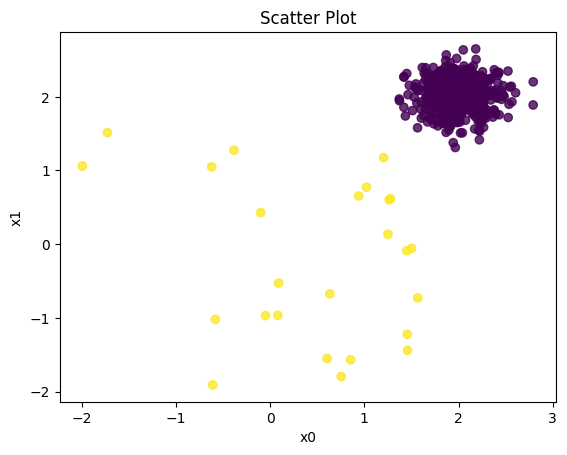

In [34]:
# Plotting two features, the yellow dots represent the outlier points

plt.scatter(X_train_pd[0], X_train_pd[1], c=y_train, alpha=0.8)
plt.title("Scatter Plot")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

## **Understanding the `contamination` Parameter in HBOS**

The `contamination` parameter holds significant charm when delving deep into anomaly detection algorithms. It’s akin to a compass, guiding the algorithm on its journey to discern the ordinary from the extraordinary. Let's break it down:

### **1. The Essence of `contamination`**:
- `contamination` unravels our expectations about the proportion of outliers in our dataset.
    * 📌 For instance, setting `contamination` to 0.05 is like whispering to the algorithm: "I reckon 5% of my data are outliers."

### **2. The Role of `contamination`**:
- Post the task of scoring each data instance based on its semblance to an anomaly, the scores are neatly arranged in order.
- The majestic threshold (🔖 `hbos.threshold_` in your code) is then carved such that the scores of the top x% instances dance beyond this line, where x is the very contamination rate we set.
    * 🎭 Think of it as a theatrical curtain: Only the top 5% of performers (anomaly scores) are unveiled if `contamination` is set to 0.05.

### **3. The Prediction Ritual with the Threshold**:
- Invoking the `predict()` function is like asking the algorithm to don its detective hat.
    * 🔍 Any instance with an anomaly score that leaps above the threshold? Ah! That's an outlier and gets a badge of 1.
    * 🌼 Those that remain below the threshold? They are the usual, familiar instances, earning a badge of 0.

---

📜 **In Summation**:

`contamination` isn't just a parameter; it's a beacon. By lighting it at the desired intensity, we gently guide the algorithm across the vast landscape of our data, signaling where we suspect the outliers might lurk. It's like whispering secrets of our data, helping the algorithm tune its senses accordingly.


In [37]:
# Build our model
from pyod.models.hbos import HBOS

# Hyperparameters
n_bins = 50
hbos = HBOS(n_bins=n_bins, contamination=0.05)
hbos.fit(X_train)

# Threshold is when we specify the "contamination" level of the data
print(f"The threshold for the defined contamination rate: {hbos.threshold_}")


The threshold for the defined contamination rate: 5.563712646460526


In [39]:
# Training Data
y_train_scores = hbos.decision_function(X_train)
y_train_pred = hbos.predict(X_train)

# Test Data
# predict: outlier labels (0 or 1)
y_test_scores = hbos.decision_function(X_test)
y_test_pred = hbos.predict(X_test)

In [121]:
y_train_scores[-30:]

array([-3.32653726,  0.09314864, -2.52170724, -1.54007687, -2.48219458,
       15.70661307, 15.26587619, 17.76962794, 13.99470088, 16.85944126,
       17.08901445, 14.92813102, 16.64750208, 16.4753673 , 15.9730833 ,
       14.96746324, 14.48583455, 16.38895523, 16.8593846 , 14.96746324,
       17.09289967, 14.29990961, 17.53028396, 14.19642163, 16.47242688,
       17.08886718, 17.55826415, 15.08660559, 15.77646537, 17.12939324])

In [40]:
def count_stat(vector):
    # We get '0' and '1' so run the frequency for each vector
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print(f'The training data: {count_stat(y_train_pred)}')
print(f'The testing data: {count_stat(y_test_pred)}')

The training data: {0: 475, 1: 25}
The testing data: {0: 474, 1: 26}


## **Outlier Threshold Adjustment in Unsupervised Learning**

In unsupervised machine learning scenarios, pinpointing the precise number of outliers can be challenging. However, to improve model accuracy and precision, one can employ the following strategies:

### **1. Sorting Anomaly Scores**:
- Order anomaly scores from highest to lowest. This prioritization allows for an immediate focus on the most likely outliers.

### **2. Visualization**:
- Visualizing the distribution of anomaly scores can provide clarity on potential thresholds. Such visual aids can highlight patterns or inflection points that could serve as a basis for setting thresholds.

### **3. Adjusting the Threshold**:
- **Increasing the Threshold**:
    * Elevating the threshold may lead to more conservative outlier detection, potentially reducing false positives.
- **Decreasing the Threshold**:
    * Reducing the threshold might capture more observations as anomalies, increasing the risk of misclassifying normal instances as outliers.

---

**Conclusion**:

The key to successful anomaly detection in unsupervised learning lies in adjusting the threshold optimally. It's essential to balance the sensitivity and specificity of the model, ensuring that genuine outliers are detected without generating an excessive number of false alarms.


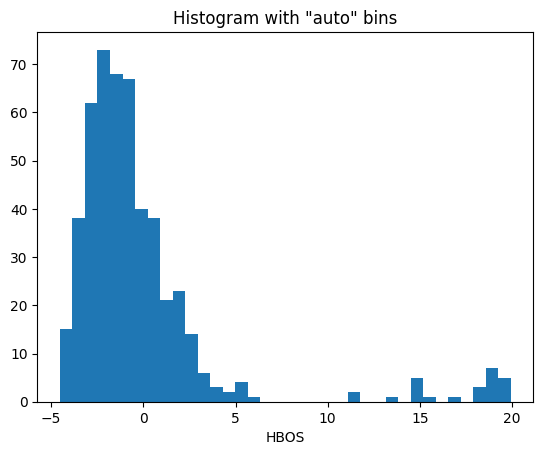

In [41]:
plt.hist(y_test_scores, bins='auto')
plt.title('Histogram with "auto" bins')
plt.xlabel('HBOS')
plt.show()

## **Determining Outliers through Histogram Analysis**

Based on the insights derived from the histogram, a threshold of **5.5** is suggested for outlier detection. It's imperative to understand that:

- The choice of this threshold inherently governs the percentage of instances classified as outliers within the dataset. 

Consequently, careful consideration and validation of the threshold are crucial to ensuring an accurate representation of the underlying data distribution.


## **Function: `descriptive_stat_threshold`**

This function computes descriptive statistics for anomaly detection, particularly focusing on differentiating between 'Normal' and 'Outlier' groups based on a given threshold.

### **Parameters**:
- **`df`**: The input dataframe.
- **`pred_score`**: A series or array that contains the anomaly scores for each observation in `df`.
- **`threshold`**: The cutoff value for classifying observations as 'Normal' or 'Outlier'.

### **Process**:

1. **Dataframe Creation**:
   - The function ensures that `df` is a pandas dataframe.
   - A new column, `Anomaly_Score`, is added to the dataframe, representing the anomaly scores for each observation.
  
2. **Classification into Groups**:
   - Based on the given `threshold`, each observation is classified into one of two groups:
     - **`Normal`**: For observations where the anomaly score is less than the threshold.
     - **`Outlier`**: For observations where the anomaly score is equal to or exceeds the threshold.

3. **Descriptive Statistics Calculation**:
   - The data is grouped by either 'Normal' or 'Outlier' based on the assigned group from the previous step.
   - For each group, the function computes:
     - The count of observations.
     - The mean anomaly score.
   - The percentage representation (`count_perc`) of each group relative to the total number of observations is also calculated.
   - Lastly, the mean anomaly score is rounded to two decimal places.

### **Returns**:

- A dataframe (`stat`) that provides a summary of the count, mean anomaly score, and percentage representation for both 'Normal' and 'Outlier' groups.


In [107]:
def descriptive_stat_threshold(df,
                                pred_score,
                                threshold):
    # Find out how many 0 and 1

    
    # Now let's show the summary statistics:
    df = pd.DataFrame(df)
    
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score'] < threshold, 'Normal', 'Outlier')

    # Summary Statistics

    l = [col for col in df.columns if str(col).isdigit()]


    agg_dict = {}
    for col in l:
             agg_dict[str(col)] = (col, "mean")


    agg_dict['count'] = ("Anomaly_Score", "count")
    agg_dict['Anomaly_Score'] = ("Anomaly_Score", "mean")

    stat = df.groupby('Group', as_index=False).agg(**agg_dict).assign(count_perc=lambda x: (x['count'] / x['count'].sum()) * 100).round({'mean': 2})

    return stat





In [108]:
descriptive_stat_threshold(X_train, y_train_scores, hbos.threshold_)

,Group,0,1,2,3,4,5,count,Anomaly_Score,count_perc
0,Normal,2.003067,2.011302,2.006399,1.991409,2.008367,1.984887,475,-1.276625,95.0
1,Outlier,0.453548,-0.209294,-0.474818,-0.231157,-0.034642,-0.055947,25,16.024400,5.0


In [109]:
descriptive_stat_threshold(X_test,y_test_scores, hbos.threshold_)

,Group,0,1,2,3,4,5,count,Anomaly_Score,count_perc
0,Normal,2.017510,2.012993,2.008979,1.988217,2.006077,2.002306,474,-1.054529,94.8
1,Outlier,0.056503,-0.430108,-0.116857,0.022105,0.019796,0.175088,26,16.646814,5.2


## **Function: `confusion_matrix`**

The `confusion_matrix` function calculates the confusion matrix for actual vs. predicted values, based on a given threshold.

### **Parameters**:
- **`actual`**: The true labels or ground truth (usually 0 for 'Normal' and 1 for 'Outlier').
- **`score`**: Predicted scores or probabilities for each observation.
- **`threshold`**: The cutoff value for classifying observations. If the predicted score is less than or equal to this threshold, the observation is classified as 0, otherwise, it's classified as 1.

### **Process**:

1. **Dataframe Construction**:
   - A new dataframe, `actual_pred`, is created with two columns: 
     - **`actual`**: Contains the true labels.
     - **`pred`**: Contains the predicted scores or probabilities.

2. **Classification based on Threshold**:
   - For each predicted score in `actual_pred['pred']`:
     - If the score is less than or equal to the threshold, it's set to 0.
     - If the score is greater than the threshold, it's set to 1.

3. **Constructing the Confusion Matrix**:
   - Using the `pd.crosstab()` function, a confusion matrix is constructed. This function cross-tabulates the `actual` vs. `pred` columns, giving counts of the combinations (i.e., true positives, true negatives, false positives, and false negatives).

### **Returns**:

- A confusion matrix (`cm`) that displays the number of observations for each actual vs. predicted combination.


In [49]:
def confusion_matrix(actual, score, threshold):
    actual_pred = pd.DataFrame({'actual': actual, 'pred': score})

    actual_pred['pred'] = np.where(actual_pred['pred'] <= threshold, 0, 1)

    cm = pd.crosstab(actual_pred['actual'], actual_pred['pred'])
    
    return cm

In [52]:
confusion_matrix(y_train, y_train_scores, hbos.threshold_)

pred,0,1
actual,,
0.0,475,0
1.0,0,25


In [54]:
confusion_matrix(y_test,y_test_scores, hbos.threshold_)

pred,0,1
actual,,
0.0,474,1
1.0,0,25


## **HBOS and the Importance of Binning**

Histogram-based Outlier Score (HBOS) is an efficient unsupervised method used for anomaly detection. The technique relies on the idea that the data distribution is multidimensional, and histograms can be used for outlier detection in these dimensions.

### **Why Binning is Crucial**:
- HBOS's performance significantly depends on how the data is binned into histograms.
- **Too Few Bins (Wide Ranges)**: This risks classifying outliers as normal because a broad bin might encapsulate both normal data points and anomalies.
- **Too Many Bins (Narrow Ranges)**: The opposite problem arises. Normal data points might be isolated in their bins and classified as outliers.

### Setting Up Different Bin Sizes:
- A variety of bin sizes are defined for evaluation. This list ranges from smaller bin sizes (like 5) to much larger ones (up to 100).
- Why multiple bin sizes? The binning strategy has a direct impact on the HBOS performance. Here's the nuance: if we use too few bins (i.e., broader ranges), there's a risk of classifying outliers as normal. On the other hand, if bins are too narrow, we might end up mislabeling typical points as outliers.

### Initializing Arrays for Model Results:
- Prior to training, dedicated arrays are prepared. These are designed to store the anomaly scores obtained for each binning strategy. One is for the training data, and the other is for the test data.

### Training the Model Across Binning Strategies:
- For each bin size defined earlier, the HBOS model is trained. Following this, the model's "decision function" or scoring mechanism is used to evaluate and assign anomaly scores to each data point.
- These scores are saved systematically in the aforementioned arrays, with each column corresponding to a specific binning strategy.

### Standardizing Decision Scores:
- Once the modeling is complete, a secondary standardization phase is enacted. Here, all the decision scores extracted from the models trained with different binning strategies are standardized.
- This step might raise eyebrows! But, its importance is in ensuring a consistent scale across all the scores, especially if there are plans for further analyses or combination of these scores.

---




In [110]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.models.hbos import HBOS


# Standardize data (z-score to have mean 0 and std of 1) ensuring that each feature contributes equally to the computation
X_train_norm, X_test_norm = standardizer(X_train, X_test)

# Test a range of binning 
k_list = [5, 10, 15, 20, 25, 30, 50, 60, 75, 100] # All possible bin ranges
n_clf = len(k_list) 

# Prepare dataframes to store model results
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])

# Modeling
for i in range(n_clf):
    k = k_list[i]
    hbos = HBOS(n_bins=k)
    hbos.fit(X_train_norm)

    # Store the results in each column:
    train_scores[:, i] = hbos.decision_function(X_train_norm)
    test_scores[:, i] = hbos.decision_function(X_test_norm)

# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)


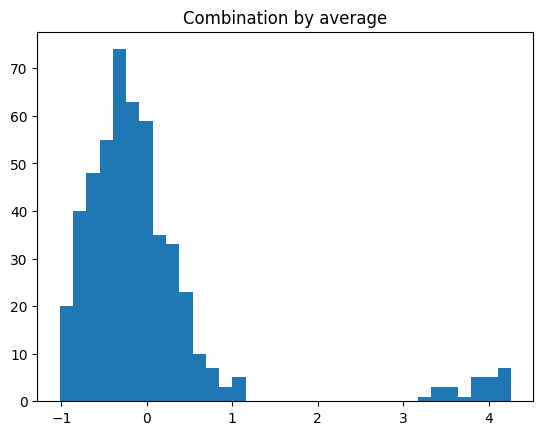

In [111]:
# Combination by average
# The test_scores_norm is 500 x 10. The "average" function will take the average of the 10 columns. The result "y_by_average" is a single column: 
y_train_by_average = average(train_scores_norm)
y_test_by_average = average(test_scores_norm)

plt.hist(y_train_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [112]:
descriptive_stat_threshold(X_train,y_train_by_average, 1.4)

,Group,0,1,2,3,4,5,count,Anomaly_Score,count_perc
0,Normal,2.003067,2.011302,2.006399,1.991409,2.008367,1.984887,475,-0.203090,95.0
1,Outlier,0.453548,-0.209294,-0.474818,-0.231157,-0.034642,-0.055947,25,3.858711,5.0


In [113]:
descriptive_stat_threshold(X_test,y_test_by_average, 1.4)

,Group,0,1,2,3,4,5,count,Anomaly_Score,count_perc
0,Normal,2.016351,2.013611,2.010482,1.987987,2.005899,2.001420,475,-0.164768,95.0
1,Outlier,0.000069,-0.539563,-0.230458,-0.052175,-0.056271,0.118837,25,3.962588,5.0
